<a href="https://colab.research.google.com/github/vanesalinas/HenryPI_DataAnalyst_PT06/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Exploratory Data Analysis (EDA)***
---

> Explorar, entender y evaluar la calidad de los datos es una condicion previa al procesamiento de los mismos. Este analisis nos permitira saber si los datos que tenemos son suficientes para cumplir con el objetivo planteado asi como tambien permite identificar patrones de comportamiento, predecir sucesos e identificar oportunidades para crear un plan de accion que permita alcanzar dicho objetivo.

### ***Cargamos los datos y creamos un DataFrame***

---
Lo primero que haremos es cargar los datos en un DataFrame para poder manipularlos y observarlos.


In [2]:
#importamos las librerías a utilizar

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los avisos
%matplotlib inline

In [4]:
#Utilizaremos el parámetro sheet_name para especificar la hoja de debemos leer
df_hechos = pd.read_excel('/content/homicidios.xlsx', sheet_name='HECHOS')
df_victimas = pd.read_excel('/content/homicidios.xlsx', sheet_name='VICTIMAS')

###***Visualizamos el DataFrame***
---

In [41]:
#mostramos los primeros 5 registros en el dataset
df_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [42]:
df_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


### ***Y hacemos una exploracion de los datos***
---

*   Visualizamos la informacion general del DataFrame: la cantidad de datos, nombres de las columnas, indices, tipos de datos y el espacio que ocupa en memoria.
Conocer los tipos de datos de cada columna es importante ya que diferentes tipos de datos requieren diferentes técnicas de manejo y diferentes tipos de operaciones.

In [43]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [44]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


*   Tamaño de DataFrame: verificamos la cantidad de filas y columnas de cada DataFrame


In [45]:
df_hechos.shape

(696, 21)

In [46]:
df_victimas.shape

(717, 10)

*   Resumen estadistico: nos muestra estadisticas de los datos numericos como valor minimo y maximo, media, desviacion estandar y cuartiles.



In [47]:
df_hechos.describe()

,N_VICTIMAS,AAAA,MM,DD,Altura,COMUNA
count,696.000000,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018.188218,6.692529,15.936782,3336.635659,7.425287
std,0.179393,1.683754,3.571309,8.639646,3060.641793,4.387050
min,1.000000,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021.000000,12.000000,31.000000,16080.000000,15.000000


In [48]:
df_victimas.describe()

,AAAA,MM,DD
count,717.000000,717.000000,717.000000
mean,2018.174338,6.688982,15.960948
std,1.672655,3.575140,8.683358
min,2016.000000,1.000000,1.000000
25%,2017.000000,4.000000,9.000000
50%,2018.000000,7.000000,16.000000
75%,2019.000000,10.000000,23.000000
max,2021.000000,12.000000,31.000000


# ***Objetivo***
---

> El Observatorio de Movilidad y Seguridad Vial (OMSV), centro de estudios que se encuentra bajo la órbita de la Secretaría de Transporte del Gobierno de la Ciudad Autónoma de Buenos Aires, nos solicita la elaboración de un proyecto de anális de datos, con el fin de generar información que le permita a las autoridades locales tomar medidas para disminuir la cantidad de víctimas fatales de los siniestros viales.

Objetivo del proyecto de análisis de datos para reducir las víctimas fatales en siniestros viales:

"Utilizar técnicas de análisis de datos para identificar patrones, tendencias y factores de riesgo relacionados con los siniestros viales en la Ciudad Autónoma de Buenos Aires, con el fin de proporcionar información detallada y relevante a las autoridades locales. Esta información será utilizada para diseñar e implementar intervenciones efectivas, basadas en la evidencia proporcionada sobre homicidios en siniestros viales acaecidos en la Ciudad de Buenos Aires durante el periodo 2016-2021, para contribuir a la reducción significativa de la cantidad de víctimas fatales en accidentes de tráfico en el área urbana."




### ***Analisis de los datos***
---
En base a nuestro objetivo comenzaremos a analizar nuestros DataFrame para llegar a las conclusiones necesarias y esperadas para cumplir con éste.

*   Valores duplicados

En el df_victimas se repiten algunos ID_hecho; esto puede deberse a un error en la asignacion del ID_hecho del dataset proporcionado, por lo que voy a eliminar los valores duplicados, dejando solo el primer registro.

In [5]:
# Normalizar los datos de la columna 'ID_hecho' (eliminar espacios en blanco y convertir a minúsculas)
df_victimas['ID_hecho'] = df_victimas['ID_hecho'].str.strip().str.lower()

# Ordenar el DataFrame según la columna 'ID_hecho'
df_victimas = df_victimas.sort_values(by='ID_hecho').reset_index(drop=True)

# Eliminar filas donde el valor en la columna 'ID_hecho' es igual al de la fila anterior
df_victimas = df_victimas[df_victimas['ID_hecho'] != df_victimas['ID_hecho'].shift()]

# Reindexar el DataFrame
df_victimas = df_victimas.reset_index(drop=True)

In [6]:
df_victimas.loc[df_victimas['ID_hecho'] == '2016-0041']

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
29,2016-0041,2016-03-29,2016,3,29,CONDUCTOR,MOTO,MASCULINO,54,2016-03-29 00:00:00


Realizamos el mismo procedimiento en el df_hechos por si tambien contiene valores duplicados y vamos a renombrar la columna ID

In [7]:
#renombramos la columna ID del df_hechos para luego poder concatenar los datos de ambos DataFrame
df_hechos = df_hechos.rename(columns={'ID': 'ID_hecho'})

# Normalizar los datos de la columna 'ID_hecho' (eliminar espacios en blanco y convertir a minúsculas)
df_hechos['ID_hecho'] = df_hechos['ID_hecho'].str.strip().str.lower()

# Ordenar el DataFrame según la columna 'ID_hecho'
df_hechos = df_hechos.sort_values(by='ID_hecho').reset_index(drop=True)

# Eliminar filas donde el valor en la columna 'ID_hecho' es igual al de la fila anterior
df_hechos = df_hechos[df_hechos['ID_hecho'] != df_hechos['ID_hecho'].shift()]

# Reindexar el DataFrame
df_hechos = df_hechos.reset_index(drop=True)

df_hechos.loc[df_hechos['ID_hecho'] == '2016-0041']

,ID_hecho,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
29,2016-0041,2,2016-03-29,2016,3,29,11:00:00,11,AV DIRECTORIO Y RIVERA INDARTE,AVENIDA,...,NaN,RIVERA INDARTE AV.,DIRECTORIO AV. y RIVERA INDARTE AV.,7,Point (100232.38564985 99530.25843190),-58.46076550,-34.63350444,MOTO-CARGAS,MOTO,CARGAS


In [8]:
#unimos los DataFrame
df_combinado = pd.merge(df_hechos, df_victimas[['ID_hecho', 'ROL', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO']], on='ID_hecho', how='left')

#visualizamos el nuevo DataFrame
df_combinado.head()

,ID_hecho,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00


In [9]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 695
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID_hecho               696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [10]:
df_combinado[df_combinado['ID_hecho'] == '2016-0041']

,ID_hecho,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
29,2016-0041,2,2016-03-29,2016,3,29,11:00:00,11,AV DIRECTORIO Y RIVERA INDARTE,AVENIDA,...,Point (100232.38564985 99530.25843190),-58.46076550,-34.63350444,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,54,2016-03-29 00:00:00


*   Valores faltantes

In [11]:
df_combinado.isnull().sum()


ID_hecho                   0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
ROL                        0
SEXO                       0
EDAD                       0
FECHA_FALLECIMIENTO        0
dtype: int64

*   Valores NaN



In [12]:
#Identificar si nuestro DataFrame tiene valores NaN:
df_combinado.isna()#Indica valores booleanos (True o False) por cada elemento
df_combinado.isna().any() #Indica valores booleanos por cada columna
df_combinado.isna().sum() #Indica el número de datos faltantes por columna


ID_hecho                   0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
ROL                        0
SEXO                       0
EDAD                       0
FECHA_FALLECIMIENTO        0
dtype: int64

No realizare ninguna modificacion a los datos faltantes porque no creo que alteren el resultado final del analisis

In [18]:
# Contar el número de víctimas por año
victimas_por_año = df_combinado.groupby('AAAA')['N_VICTIMAS'].sum()
victimas_por_año

AAAA
2016    146
2017    140
2018    149
2019    104
2020     81
2021     97
Name: N_VICTIMAS, dtype: int64

In [29]:
sorted(df_combinado['COMUNA'].unique(), reverse=True)

[15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [36]:
# Contar el número de víctimas por comuna y agrupar por año
victimas_por_año_comuna = df_combinado.groupby(['COMUNA', 'AAAA']).agg(CANTIDAD_VICTIMAS=('N_VICTIMAS', 'sum'))
victimas_por_año_comuna


CANTIDAD_VICTIMAS
COMUNA AAAA                   
0      2016                  2
1      2016                 22
       2017                 20
       2018                 20
       2019                 12
...                        ...
15     2017                  5
       2018                 11
       2019                  9
       2020                  7
       2021                  5

[91 rows x 1 columns]

*   Correlacion de variables

Buscamos patrones que relacionen unas variables con otras, la correlación entre variables puede ser positiva, es decir cuando una aumenta su valor la variable correlacionada aumenta su valor también en una proporción, si la correlación es negativa, cuando una variable aumenta la otra disminuye en una proporción y vice versa.

In [15]:
matriz_correlacion = df_combinado.corr()
matriz_correlacion

,N_VICTIMAS,AAAA,MM,DD,Altura,COMUNA
N_VICTIMAS,1.000000,-0.047410,-0.005711,0.011444,0.092772,0.007439
AAAA,-0.047410,1.000000,-0.047072,-0.038448,0.040609,0.009211
MM,-0.005711,-0.047072,1.000000,-0.019331,0.071570,0.047205
DD,0.011444,-0.038448,-0.019331,1.000000,-0.004142,-0.001415
Altura,0.092772,0.040609,0.071570,-0.004142,1.000000,0.293925
COMUNA,0.007439,0.009211,0.047205,-0.001415,0.293925,1.000000


El coeficiente de correlación es un valor entre -1 y 1 que indica la fuerza y la dirección de la relación entre las dos características. Un valor cercano a 1 indica una relación positiva fuerte, un valor cercano a -1 indica una relación negativa fuerte, y un valor cercano a 0 indica que no hay relación.

*   Visualizacion de la matriz correlacion

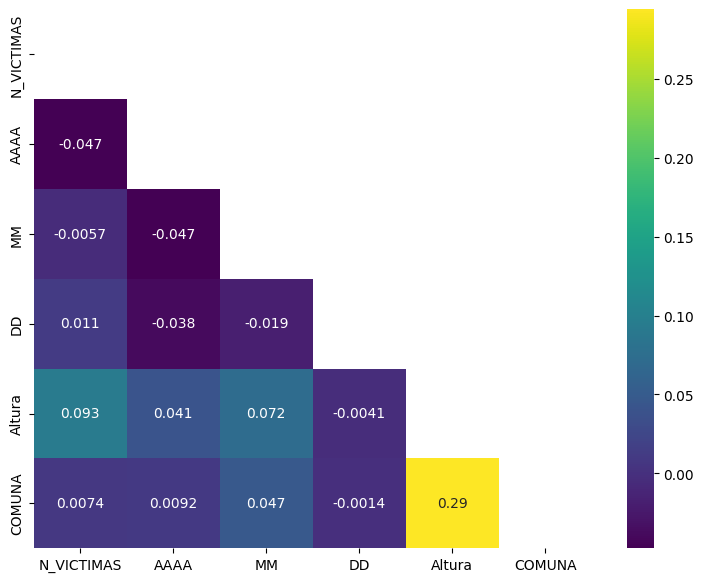

In [16]:
#Definimos el tamaño de la figura para asegurar que se observen los valores interiores
ax = plt.subplots(figsize=(9,7))

#Generamos una máscara para evitar tener un espejo en la parte superior de la gráfica y simplificar la observación
mask = np.zeros_like(matriz_correlacion)
mask[np.triu_indices_from(mask)] = True

#Usando seaborn heatmap como tipo de gráfica, colocamos los valores de la matriz de correlaciones, solicitamos que incluya los coeficientes de correlación a las celdas del mapa de calor con el argumento annot=True, seleccionamos un mapa de color y selecciónamos la máscara para no mostrar los datos duplicados, iniciando por la diagonal de unos en la parte central de la gráfica
ax = sns.heatmap(matriz_correlacion,annot=True,cmap='viridis',mask = mask)


Podemos confirmar que el año y el numero de victimas tienen una correlacion negativa; a medida que aumenta el año disminuye el numero de victimas.